# TP 1 : Análisis Exploratorio



In [44]:
# Importamos librerias para generar las visualizaciones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime

%matplotlib inline

plt.style.use('default')

sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

In [45]:
tweets = pd.read_csv('train.csv')
tweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [46]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [47]:
# Cantidad de tweets en el dataset
len(tweets)

7613

In [48]:
# Reemplazamos el string "%20" por el caracter " " en las keywords
tweets['keyword'] = tweets['keyword'].replace(to_replace="%20", value=" ", regex=True)
# Contamos las ocurrencias de cada una en todo el DataFrame
tweets['keyword'].value_counts()

fatalities             45
armageddon             42
deluge                 42
damage                 41
body bags              41
harm                   41
sinking                41
collided               40
evacuate               40
siren                  40
windstorm              40
outbreak               40
twister                40
fear                   40
weapon                 39
collision              39
earthquake             39
whirlwind              39
flames                 39
derailment             39
weapons                39
sunk                   39
famine                 39
explosion              39
sinkhole               39
hellfire               39
wreckage               39
wrecked                39
flooding               38
oil spill              38
hurricane              38
bombed                 38
upheaval               38
fatal                  38
blaze                  38
thunder                38
fire                   38
explode                38
deaths      

In [50]:
# Obtenemos categorías para las keywords agrupando términos similares (que hacen referencia a lo mismos)
similar_words = {'annihilated': 'annihilation',\
                 'arsonist': 'arson',\
                 'attacked': 'attack',\
                 'bioterror': 'bioterrorism',\
                 'blazing': 'blaze',\
                 'bleeding': 'blood',\
                 'bloody': 'blood',\
                 'blown up': 'blew up',\
                 'body bags': 'body bag',\
                 'body bagging': 'body bag',\
                 'bombed': 'bomb',\
                 'bombing': 'bomb',\
                 'buildings burning': 'buildings on fire',\
                 'burning buildings': 'buildings on fire',\
                 'burned': 'burning',\
                 'casualties': 'casualty',\
                 'catastrophic': 'catastrophe',\
                 'collapsed': 'collapse',\
                 'collide': 'collision',\
                 'collided': 'collision',\
                 'crashed': 'crash',\
                 'crushed': 'crush',\
                 'dead': 'death',\
                 'deaths': 'death',\
                 'deluged': 'deluge',\
                 'demolished': 'demolition',\
                 'demolish': 'demolition',\
                 'derailed': 'derailment',\
                 'derail': 'derailment',\
                 'desolate': 'desolation',\
                 'destroy': 'destruction',\
                 'destroyed': 'destruction',\
                 'detonate': 'detonation',\
                 'devastated': 'devastation',\
                 'drown': 'drowning',\
                 'drowned': 'drowning',\
                 'electrocuted': 'electrocute',\
                 'evacuate': 'evacuation',\
                 'evacuated': 'evacuation',\
                 'explode': 'explosion',\
                 'exploded': 'explosion',\
                 'fatal': 'fatality',\
                 'fatalities': 'fatality',\
                 'flooding': 'flood',\
                 'floods': 'flood',\
                 'forest fires': 'forest fire',\
                 'hailstorm': 'hail',\
                 'hazardous': 'hazard',\
                 'hijack': 'hijacking',\
                 'hijacker': 'hijacking', \
                 'hostages': 'hostage',\
                 'injured': 'injury',\
                 'injuries': 'injury',\
                 'inundated': 'inundation',\
                 'mass murderer': 'mass murder',\
                 'obliterate': 'obliteration',\
                 'obliterated': 'obliteration',\
                 'panicking': 'panic',\
                 'quarantined': 'quarantine',\
                 'rescued': 'rescue',\
                 'rescuers': 'rescue',\
                 'rioting': 'riot',\
                 'screamed': 'screaming',\
                 'screams': 'screaming',\
                 'sirens': 'siren',\
                 'suicide bomber': 'suicide bomb',\
                 'suicide bombing': 'suicide bomb',\
                 'sunk': 'sinking',\
                 'survived': 'survive',\
                 'survivors': 'survive',\
                 'terrorist': 'terrorism',\
                 'thunderstorm': 'thunder',\
                 'traumatised': 'trauma',\
                 'weapons': 'weapon',\
                 'wild fires': 'wildfire',\
                 'wounds': 'wounded',\
                 'wreck': 'wreckage',\
                 'wrecked': 'wreckage'
                 }
tweets['keyword_category'] = tweets['keyword']
tweets['keyword_category'].replace(similar_words, inplace=True)
tweets['keyword_category'].value_counts()

fatality               120
wreckage               115
collision              113
evacuation             112
derailment             112
explosion              110
flood                  109
body bag               107
injury                 106
screaming              105
buildings on fire      105
blood                  105
drowning               104
death                  104
destruction            103
bomb                   101
hijacking              100
suicide bomb            99
demolition              97
survive                 95
rescue                  92
obliteration            91
sinking                 80
weapon                  78
blaze                   72
attack                  71
thunder                 71
quarantine              71
wounded                 70
panic                   70
collapse                69
riot                    69
casualty                69
hazard                  69
deluge                  69
siren                   69
crush                   68
h

In [65]:
print ('Cantidad de keywords distintas:', tweets['keyword'].value_counts().count())
print ('Cantidad de categorías de keywords distintas:', tweets['keyword_category'].value_counts().count())

Cantidad de keywords distintas: 221
Cantidad de categorías de keywords distintas: 143


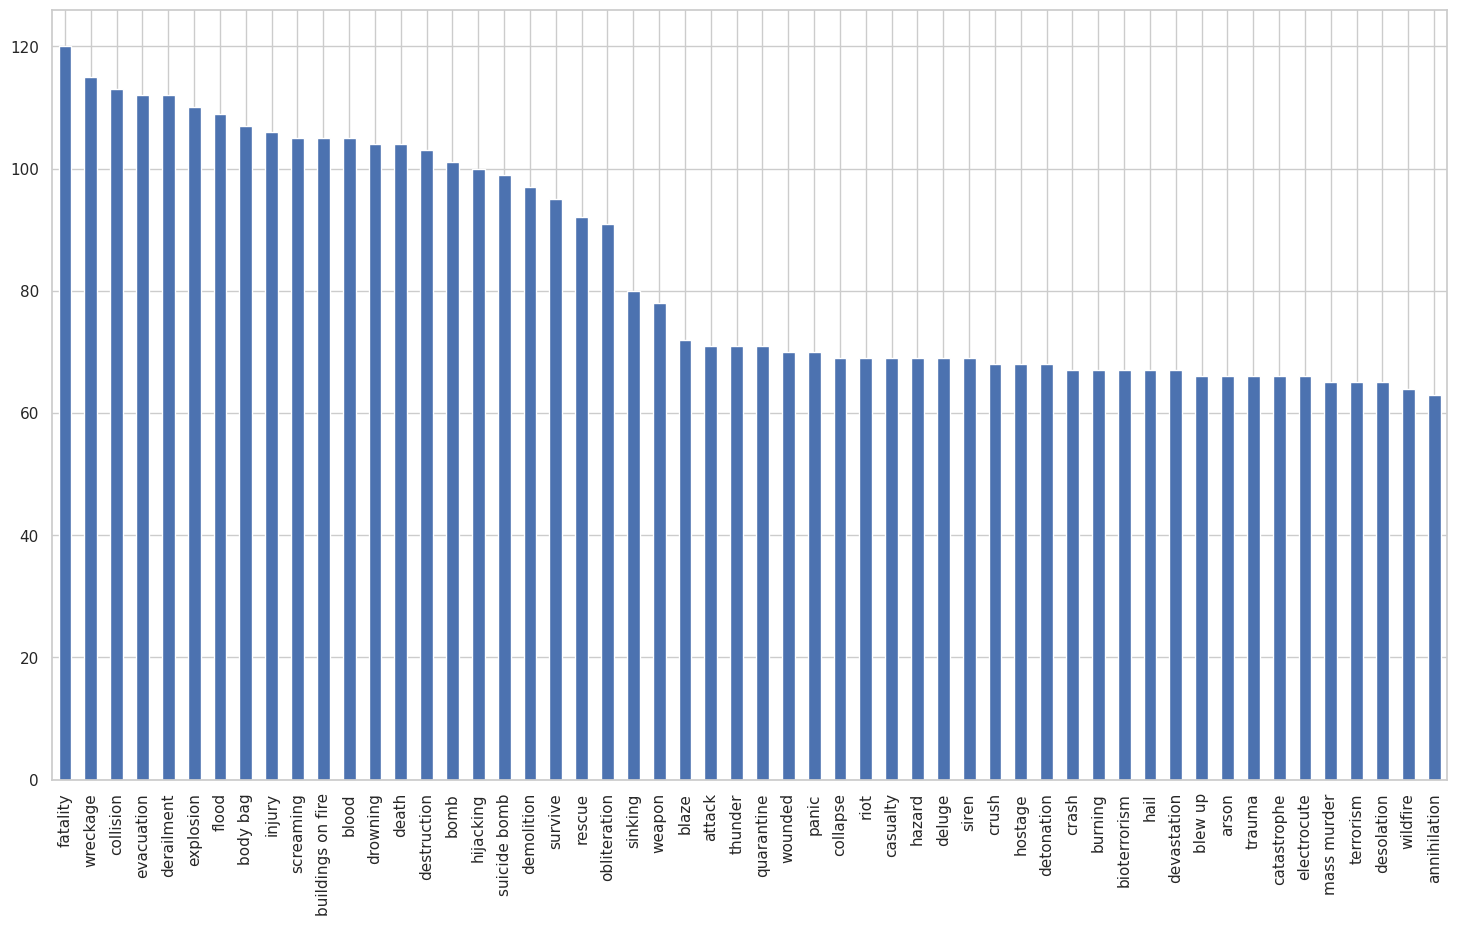

In [83]:
# Categorías con mayor cantidad de tweets asociados
main_keyword_categories_count = tweets['keyword_category'].value_counts()
main_keyword_categories_count = \
main_keyword_categories_count[main_keyword_categories_count > main_keyword_categories_count.mean()]
main_keyword_categories_count.plot(kind='bar', figsize=(18,10))

In [51]:
# Armamos un DataFrame con aquellos tweets que tienen el campo keyword en blanco
empty_keywords=tweets.loc[tweets['keyword'].isna()==True]
empty_keywords_df=empty_keywords.loc[:,['id','text','target']]
pd.set_option("display.max_colwidth", None)
# pd.set_option("display.max_rows", None, "display.max_columns", None)
empty_keywords_df

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,"13,000 people receive #wildfires evacuation orders in California",1
4,7,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1
5,8,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1
6,10,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1
7,13,I'm on top of the hill and I can see a fire in the woods...,1
8,14,There's an emergency evacuation happening now in the building across the street,1
9,15,I'm afraid that the tornado is coming to our area...,1


In [52]:
# Generamos una nueva columna con la longitud del tweet (en cantidad de caracteres)
tweets['length'] = tweets['text'].str.len()
tweets['length'].describe()

count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: length, dtype: float64

In [53]:
tweets_by_target = tweets.groupby('target').agg({'length': ['max', 'min', 'mean', 'count']})
tweets_by_target.columns = ['max_length', 'min_length', 'mean_length', 'tweet_count']
tweets_by_target.reset_index()
tweets_by_target

,max_length,min_length,mean_length,tweet_count
target,,,,
0,157,7,95.706817,4342
1,151,14,108.113421,3271


Text(0.5, 0, 'Veracidad del tweet')

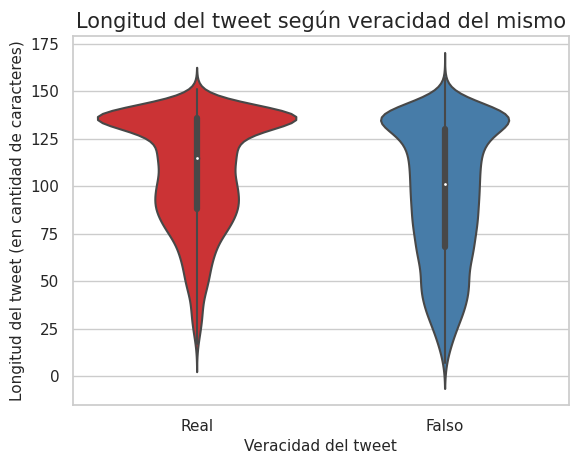

In [54]:
tweets['target'].replace(to_replace=[0, 1], value=['Falso','Real'], inplace=True)
plot = sns.violinplot(x='target', y='length', data=tweets, palette = 'Set1')
plot.set_title("Longitud del tweet según veracidad del mismo", fontsize=15)
plot.set_ylabel("Longitud del tweet (en cantidad de caracteres)", fontsize=11)
plot.set_xlabel("Veracidad del tweet", fontsize=11)
